In [12]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [13]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [14]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1




Beginning Data Retrieval     
-----------------------------


In [15]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each of the latitude and longitude combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

622

In [16]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=12541dcd367261fc7c2e2e12a500423a


In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        # Conver the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information itno city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity, 
                         "Cloudiness": city_clouds, 
                         "Wind Speed": city_wind, 
                         "Country": city_country, 
                         "Date": city_date})

# If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
    
# Indidcate that Data Loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Processing Record 23 of Set 13 | busselton
Processing Record 24 of Set 13 | khatanga
Processing Record 25 of Set 13 | severo-kurilsk
Processing Record 26 of Set 13 | vila franca do campo
Processing Record 27 of Set 13 | arraial do cabo
Processing Record 28 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 29 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 30 of Set 13 | vanimo
Processing Record 31 of Set 13 | kankan
Processing Record 32 of Set 13 | ponta do sol
Processing Record 33 of Set 13 | bangui
Processing Record 34 of Set 13 | rungata
City not found. Skipping...
Processing Record 35 of Set 13 | zhigansk
Processing Record 36 of Set 13 | fontainebleau
Processing Record 37 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 38 of Set 13 | bandarbeyla
Processing Record 39 of Set 13 | buraydah
Processing Record 40 of Set 13 | saint-philippe
Processing Record 41 of Set 13 | castro
Processing Record 42 of Set 13 | port elizabeth

Processing Record 33 of Set 16 | duldurga
Processing Record 34 of Set 16 | amderma
City not found. Skipping...
Processing Record 35 of Set 16 | kitob
Processing Record 36 of Set 16 | kenai
Processing Record 37 of Set 16 | pacific grove
Processing Record 38 of Set 16 | guerrero negro
Processing Record 39 of Set 16 | hihifo
City not found. Skipping...
Processing Record 40 of Set 16 | kang
Processing Record 41 of Set 16 | hithadhoo
Processing Record 42 of Set 16 | avarua
Processing Record 43 of Set 16 | walker
Processing Record 44 of Set 16 | werda
Processing Record 45 of Set 16 | ixtapa
Processing Record 46 of Set 16 | santa ana
Processing Record 47 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 16 | galesong
Processing Record 49 of Set 16 | ketchikan
Processing Record 50 of Set 16 | nalut
Processing Record 1 of Set 17 | socuellamos
Processing Record 2 of Set 17 | forest grove
Processing Record 3 of Set 17 | bethel
Processing Record 4 of Set 17 | ahtopol


Processing Record 15 of Set 20 | linkoping
Processing Record 16 of Set 20 | victoria
Processing Record 17 of Set 20 | praia
Processing Record 18 of Set 20 | tura
Processing Record 19 of Set 20 | tecoanapa
Processing Record 20 of Set 20 | te anau
Processing Record 21 of Set 20 | ylivieska
Processing Record 22 of Set 20 | port blair
Processing Record 23 of Set 20 | asau
City not found. Skipping...
Processing Record 24 of Set 20 | krutinka
Processing Record 25 of Set 20 | solnechnyy
Processing Record 26 of Set 20 | quepos
Processing Record 27 of Set 20 | constantine
Processing Record 28 of Set 20 | mar del plata
Processing Record 29 of Set 20 | esperance
Processing Record 30 of Set 20 | rio gallegos
Processing Record 31 of Set 20 | candolim
Processing Record 32 of Set 20 | nantucket
Processing Record 33 of Set 20 | avera
Processing Record 34 of Set 20 | belyy yar
Processing Record 35 of Set 20 | wodonga
Processing Record 36 of Set 20 | luderitz
Processing Record 37 of Set 20 | talcher
Pro

Processing Record 48 of Set 23 | boende
Processing Record 49 of Set 23 | atbasar
Processing Record 50 of Set 23 | kahului
Processing Record 1 of Set 24 | manicore
Processing Record 2 of Set 24 | dawson creek
Processing Record 3 of Set 24 | puerto del rosario
Processing Record 4 of Set 24 | svetlogorsk
Processing Record 5 of Set 24 | port hardy
Processing Record 6 of Set 24 | kilindoni
Processing Record 7 of Set 24 | tunduru
City not found. Skipping...
Processing Record 8 of Set 24 | llano de piedra
Processing Record 9 of Set 24 | odweyne
City not found. Skipping...
Processing Record 10 of Set 24 | sola
Processing Record 11 of Set 24 | atambua
Processing Record 12 of Set 24 | santa maria
Processing Record 13 of Set 24 | ta khmau
Processing Record 14 of Set 24 | lensk
Processing Record 15 of Set 24 | ucluelet
Processing Record 16 of Set 24 | tatarsk
Processing Record 17 of Set 24 | hofn
Processing Record 18 of Set 24 | port macquarie
Processing Record 19 of Set 24 | praia da vitoria
Proc

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,45,AU,2019-11-05 23:12:37,65,-33.64,115.35,55.00,5.14
1,Khatanga,0,RU,2019-11-05 23:12:37,84,71.98,102.47,-5.46,10.29
2,Severo-Kurilsk,85,RU,2019-11-05 23:12:38,84,50.68,156.12,35.10,19.35
3,Vila Franca Do Campo,75,PT,2019-11-05 23:12:38,63,37.72,-25.43,60.80,5.82
4,Arraial Do Cabo,75,BR,2019-11-05 23:12:38,74,-22.97,-42.02,82.40,3.36
5,Vanimo,98,PG,2019-11-05 23:12:39,77,-2.67,141.30,80.74,6.06
6,Kankan,38,GN,2019-11-05 23:12:39,68,10.38,-9.30,76.48,2.64
7,Ponta Do Sol,96,BR,2019-11-05 23:12:39,83,-20.63,-46.00,71.13,3.04
8,Bangui,20,CF,2019-11-05 23:12:40,100,4.39,18.55,71.60,2.24
9,Zhigansk,66,RU,2019-11-05 23:12:40,95,66.77,123.37,-16.12,7.76


In [31]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [32]:
# Reordered DataFrame
city_data_df = city_data_df[new_column_order]

In [33]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2019-11-05 23:12:37,-33.64,115.35,55.00,65,45,5.14
1,Khatanga,RU,2019-11-05 23:12:37,71.98,102.47,-5.46,84,0,10.29
2,Severo-Kurilsk,RU,2019-11-05 23:12:38,50.68,156.12,35.10,84,85,19.35
3,Vila Franca Do Campo,PT,2019-11-05 23:12:38,37.72,-25.43,60.80,63,75,5.82
4,Arraial Do Cabo,BR,2019-11-05 23:12:38,-22.97,-42.02,82.40,74,75,3.36
5,Vanimo,PG,2019-11-05 23:12:39,-2.67,141.30,80.74,77,98,6.06
6,Kankan,GN,2019-11-05 23:12:39,10.38,-9.30,76.48,68,38,2.64
7,Ponta Do Sol,BR,2019-11-05 23:12:39,-20.63,-46.00,71.13,83,96,3.04
8,Bangui,CF,2019-11-05 23:12:40,4.39,18.55,71.60,100,20,2.24
9,Zhigansk,RU,2019-11-05 23:12:40,66.77,123.37,-16.12,95,66,7.76


In [34]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [37]:
# Import the time module - PENDING
import time
# Get today's date in seconds
today = time.time()
today

1572998099.4867697

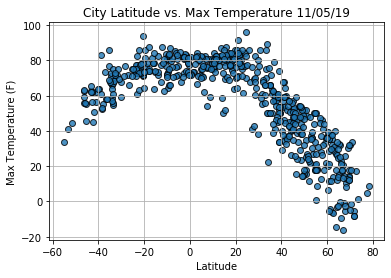

In [56]:
# Build the scatter plot for latitude vs. max temp
plt.scatter(lats, 
           max_temps,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

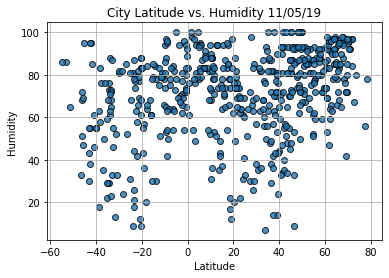

In [57]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, 
           humidity,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

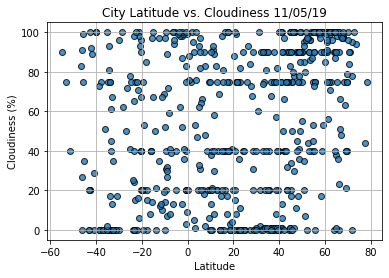

In [58]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
           cloudiness,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

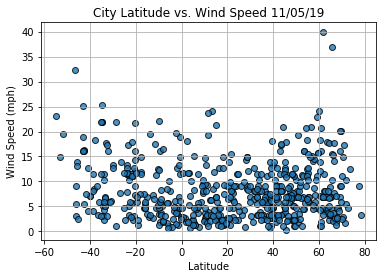

In [59]:
# Build the scatter plot for latitude vs. Wind speed
plt.scatter(lats, 
           wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()